In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Understanding and Exploration

In this section we will load the data and will try to get a basic understanding of the data.

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Summary

In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
null_cols = data.isnull().sum()
perc_null_cols = null_cols * 100/len(data)
perc_null_cols[perc_null_cols > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

From the above, we can see that the data has 1460 rows and 81 columns. There are many columns which has null values which needs to be cleaned up, which we will do in the next section.

# Data Cleanup

In the current section we will clean up the data.

We will define some utility functions which would be useful in the coming sections

In [7]:
def get_null_columns(dataframe):
    null_cols = data.isnull().sum()
    perc_null_cols = null_cols * 100/len(data)
    return perc_null_cols[perc_null_cols > 0].sort_values(ascending=False)

## Missing Values

In [8]:
numerical_columns = data.select_dtypes(include=np.number).columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
data[numerical_columns].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [10]:
categorical_columns = data.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In pandas if the value is present as NA, it would be parsed as null values. So for categorical variables if the original data csv is having NA, that would be coming as null. These can be safely set as NA values again.

In [11]:
data[categorical_columns] = data[categorical_columns].fillna('NA')
data[categorical_columns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [12]:
null_cols = get_null_columns(data)
null_cols

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

The remaining null columns are for numerical types. We will set them with the median values, except for GarageYrBlt, which can be populated with 0. This would be handled later when we convert the date to age of the garage.

In [13]:
for column in ['LotFrontage', 'MasVnrArea']:
    data[column] = data[column].fillna(data[column].median())
    
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
get_null_columns(data)

Series([], dtype: float64)

Now the missing values are all handled

## Handling Numeric Columns which are Categorical

Some of the categorical columns are loaded as numerical columns. We will set the types of these columns correctly.

In [14]:
categorical_numeric_columns = ['MSSubClass', 'OverallQual', 'OverallCond']

data[categorical_numeric_columns] = data[categorical_numeric_columns].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          1460 non-null   object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   ca

## Handling Dates

The age of house is more useful than year as its a more finite value.

In [15]:
date_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold']

data['age_sold'] = data['YrSold'] - data['YearBuilt']
data['age_remod'] = data['YrSold'] - data['YearRemodAdd']
data['age_garage'] = data['YrSold'] - data['GarageYrBlt']

In [16]:
data['age_garage'].value_counts()

1.0       87
0.0       84
4.0       45
2.0       35
5.0       34
3.0       34
6.0       31
31.0      31
8.0       30
9.0       27
10.0      27
7.0       26
32.0      25
11.0      25
42.0      24
2008.0    23
30.0      23
51.0      22
53.0      22
37.0      22
44.0      22
47.0      21
41.0      20
39.0      20
12.0      20
15.0      20
49.0      20
14.0      19
48.0      18
16.0      17
2007.0    17
20.0      17
34.0      16
40.0      16
46.0      16
50.0      15
2006.0    15
33.0      15
2009.0    15
43.0      15
29.0      14
28.0      14
17.0      14
13.0      14
38.0      14
45.0      14
59.0      13
36.0      13
54.0      13
69.0      12
52.0      12
26.0      11
2010.0    11
56.0      11
35.0      11
18.0      10
57.0      10
83.0       9
27.0       9
58.0       9
21.0       9
55.0       9
22.0       9
19.0       9
88.0       8
67.0       8
60.0       8
70.0       7
25.0       7
24.0       7
81.0       6
23.0       6
84.0       6
68.0       6
66.0       6
79.0       6
61.0       5

In [17]:
bins=[0,10,20,30,40,50,60,70,80,90,100,110,9999]
label=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100', '100-110', 'None']
data['age_garage'] = pd.cut(data['age_garage'],bins,labels=label)
data['age_garage'].value_counts()

0-10       376
40-50      185
30-40      183
10-20      165
50-60      129
20-30      109
None        81
60-70       54
80-90       49
70-80       31
90-100      12
100-110      2
Name: age_garage, dtype: int64

In [18]:
data = data.drop(date_columns, axis=1)
data = data.drop('MoSold', axis=1)

## Skewed Columns

For some of the columns, the most of the values are same. This wouldn't help with the analysis and these can be dropped. We are choosing to drop columns having 85% values skewed to one value.

In [19]:
categorical_columns = data.select_dtypes(exclude=np.number).columns
skewed_columns = []
for column in categorical_columns:
    percentage = data[column].value_counts(normalize=True).max()
    if (percentage > 0.80):
        skewed_columns.append(column)
skewed_columns
print('Dropping skewed columns')
print(skewed_columns)
data = data.drop(skewed_columns, axis=1)
print(data.shape)

Dropping skewed columns
['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
(1460, 55)


## Drop Id Colum
Id column is not useful for the analysis and can be just dropped

In [20]:
data = data.drop('Id', axis=1)

## Map Categorical Column Values

Few of the categorical values are better represented with numbers as they can be ordered as below

In [21]:
#categorical_columns = data.select_dtypes(exclude=np.number).columns
#print(categorical_columns)

In [22]:
#for column in ['ExterQual',  'BsmtQual']:
#    data[column] = data[column].replace({'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).astype('category')

In [23]:
#data['BsmtExposure'] = data['BsmtExposure'].replace({'NA':1,'No':2, 'Mn':3, 'Av':4, 'Gd':5}).astype('category')
#data['BsmtExposure'].value_counts()

In [24]:
#for column in ['BsmtFinType1']:
#    data[column] = data[column].replace({'NA':1,'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ': 6, 'GLQ': 7}).astype('category')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   LotShape       1460 non-null   object  
 5   LotConfig      1460 non-null   object  
 6   Neighborhood   1460 non-null   object  
 7   HouseStyle     1460 non-null   object  
 8   OverallQual    1460 non-null   category
 9   OverallCond    1460 non-null   category
 10  RoofStyle      1460 non-null   object  
 11  Exterior1st    1460 non-null   object  
 12  Exterior2nd    1460 non-null   object  
 13  MasVnrType     1460 non-null   object  
 14  MasVnrArea     1460 non-null   float64 
 15  ExterQual      1460 non-null   object  
 16  Foundation     1460 non-null   object  
 17  BsmtQual       1460 non-null   ob

# Exploratory Data Analysis

## Numerical Columns
The numerical values can be plotted against the SalePrice using scatter plot.

In [26]:
def print_scatter_plot(data, column):
    sns.scatterplot(data=data, x=column, y='SalePrice')
    plt.show()

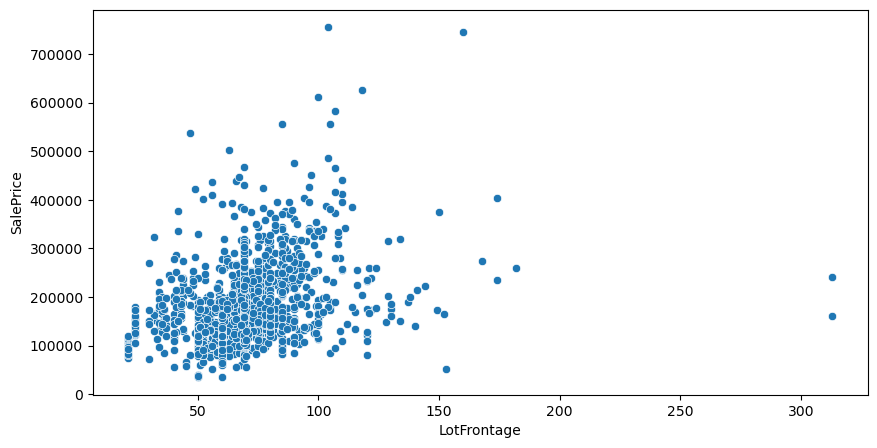

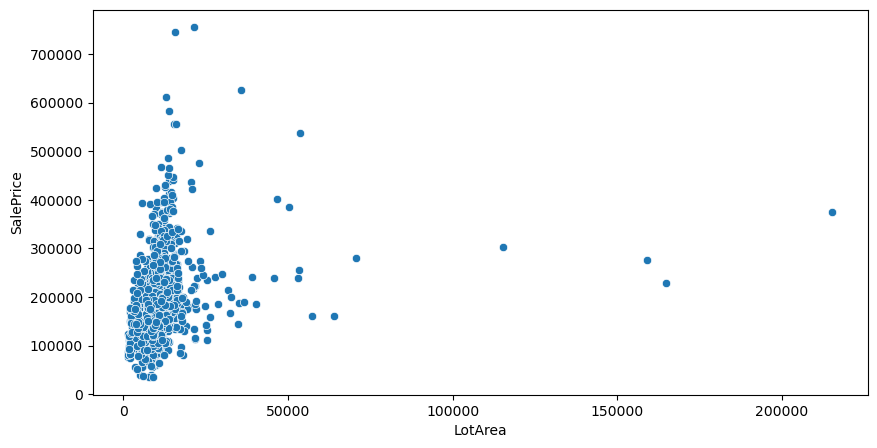

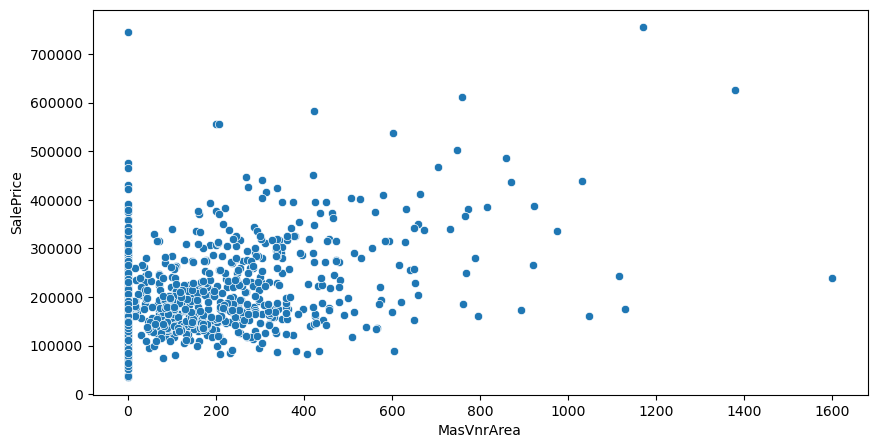

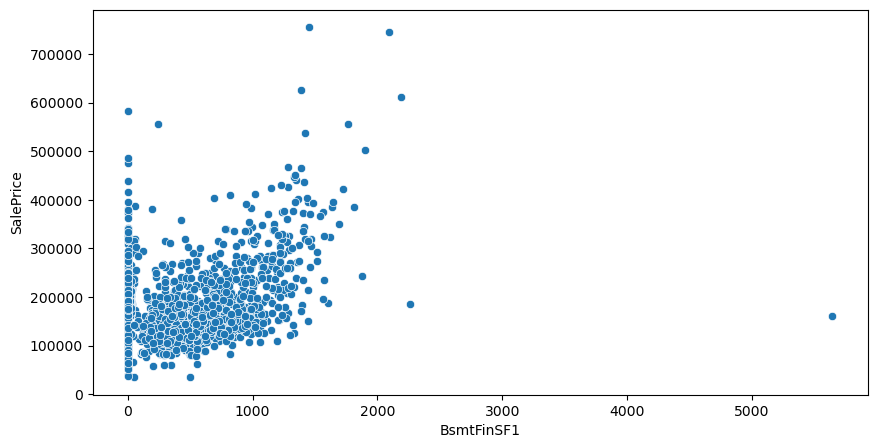

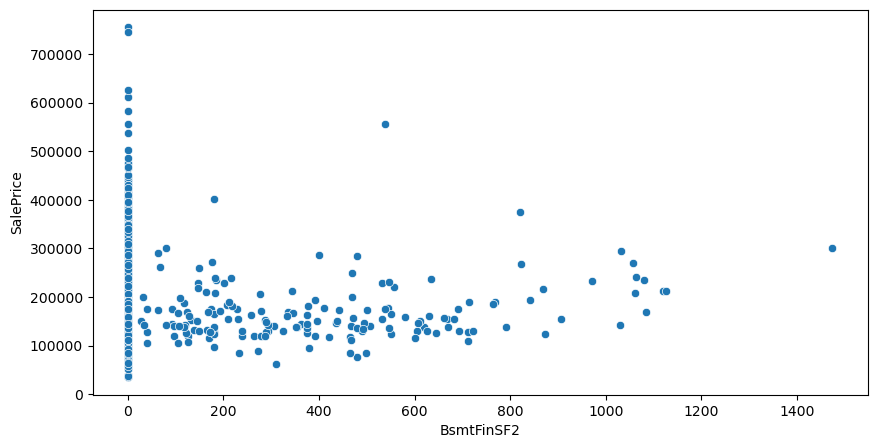

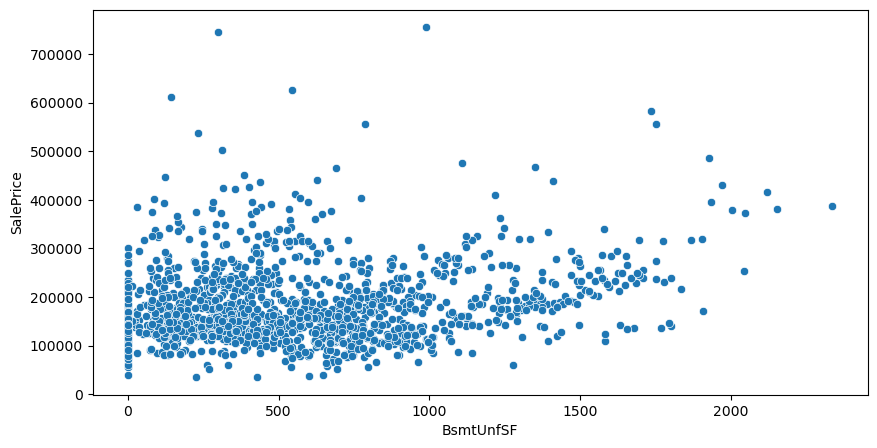

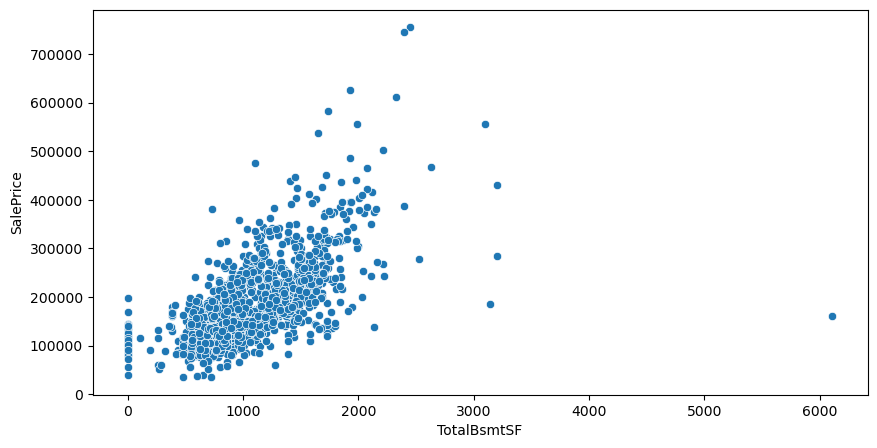

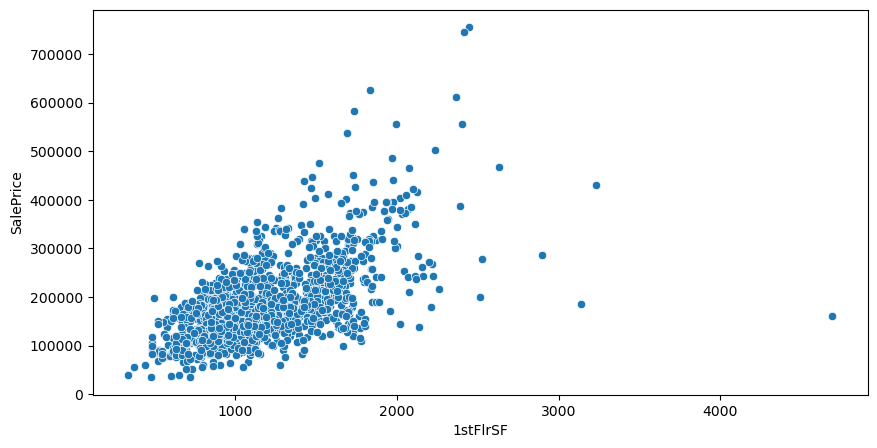

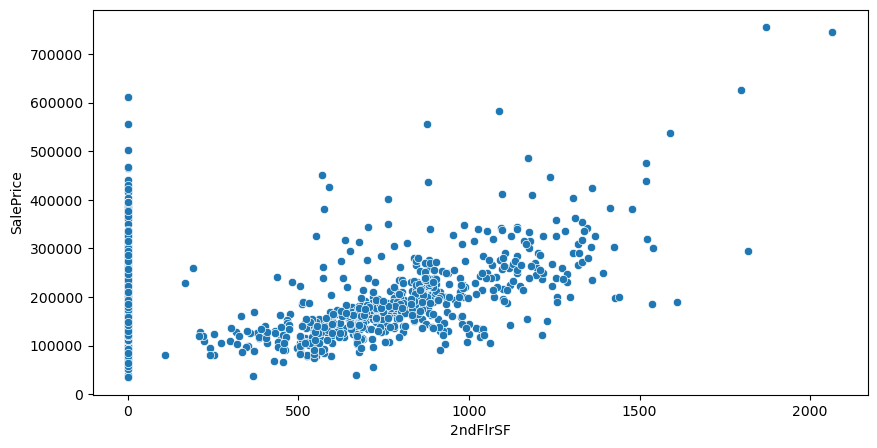

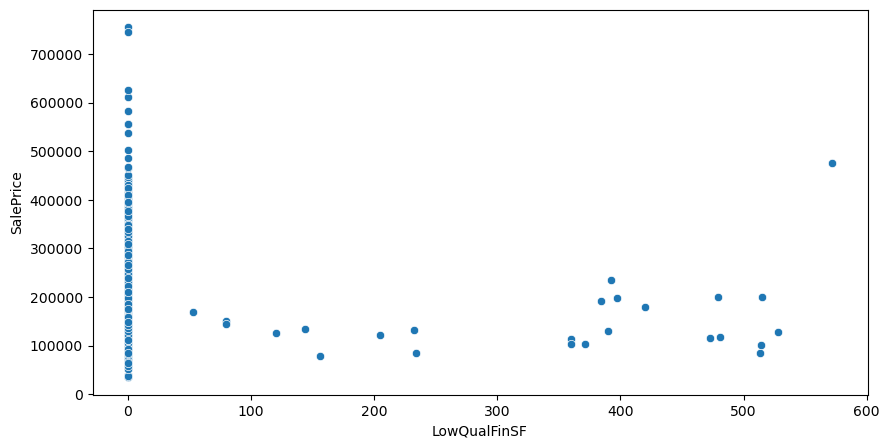

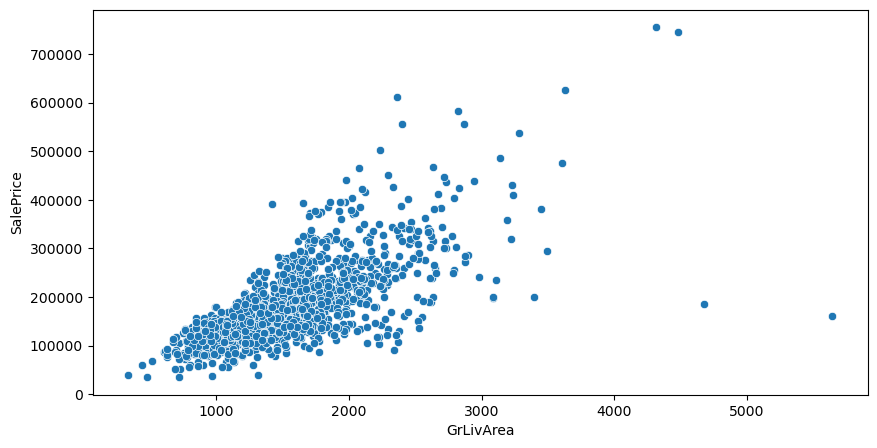

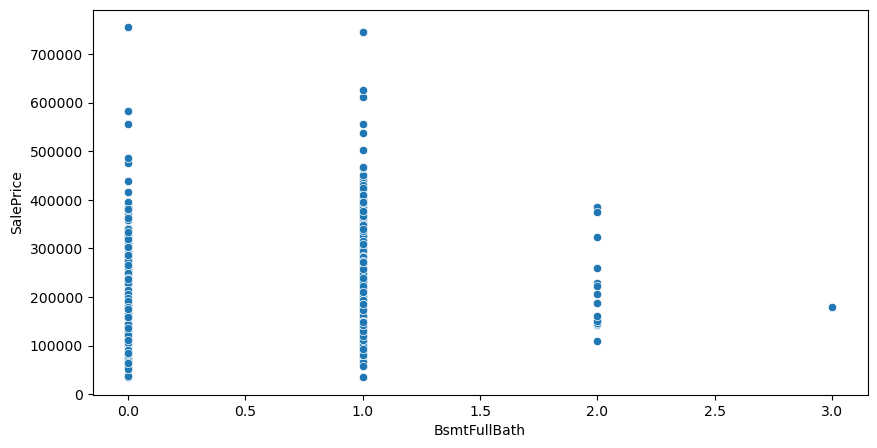

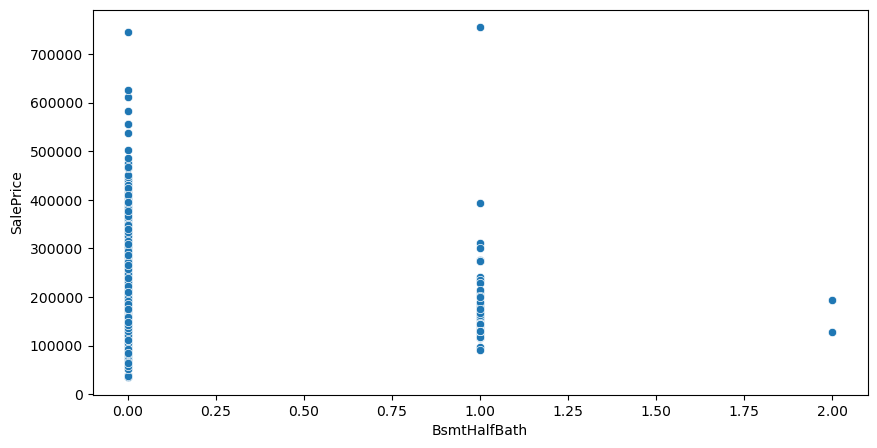

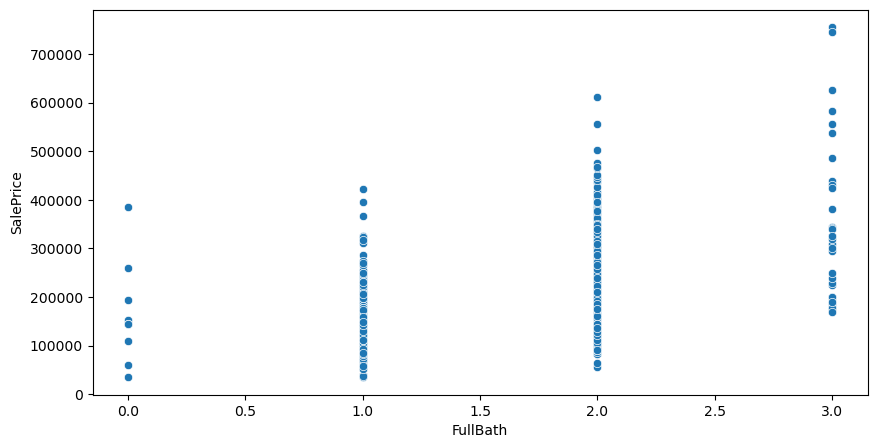

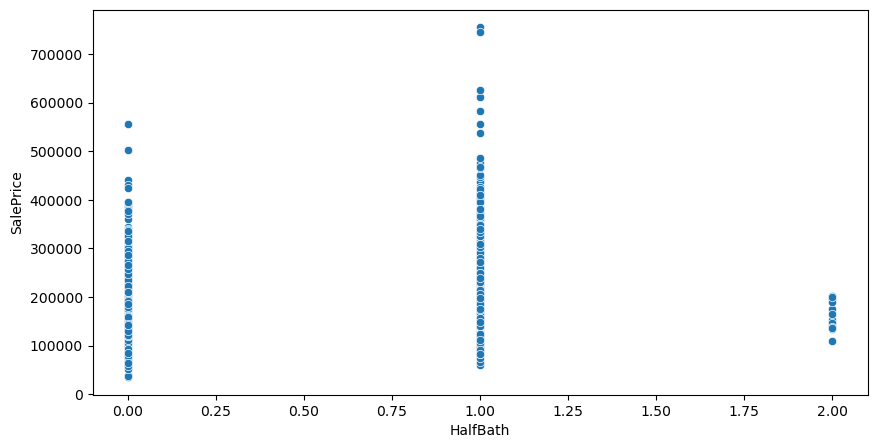

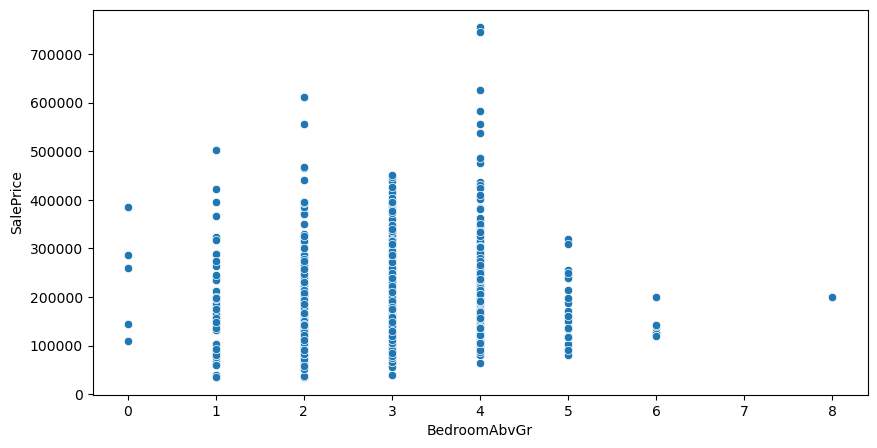

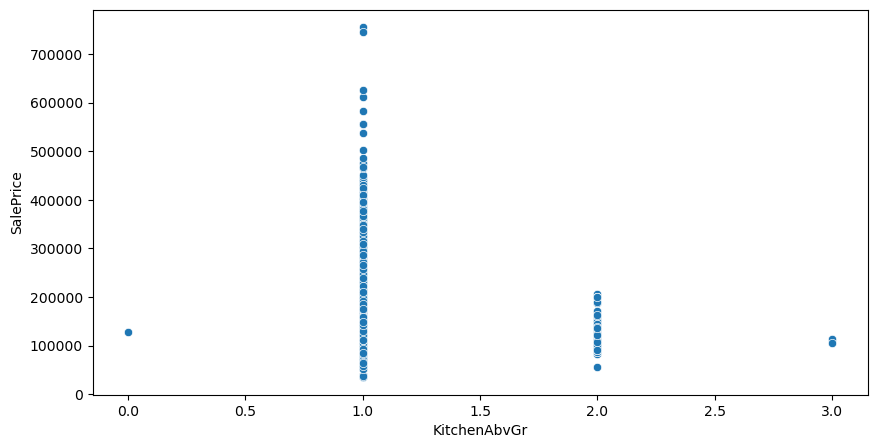

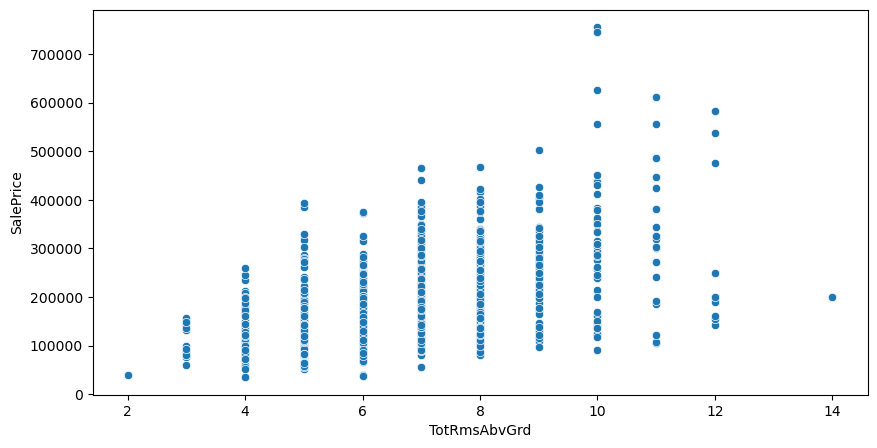

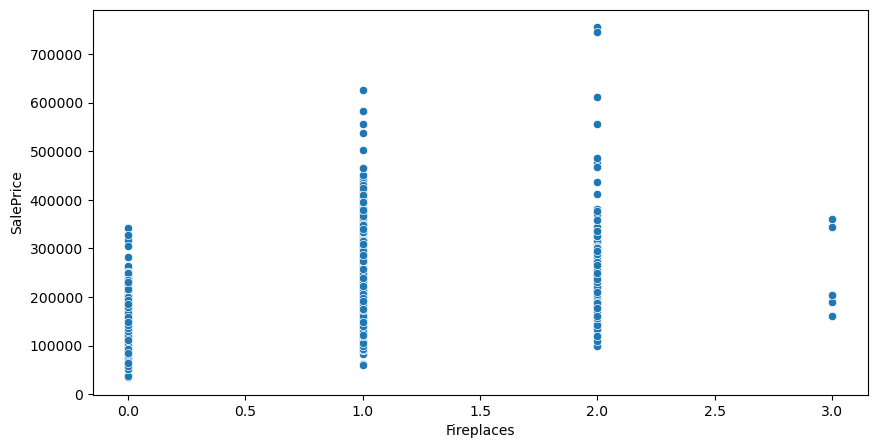

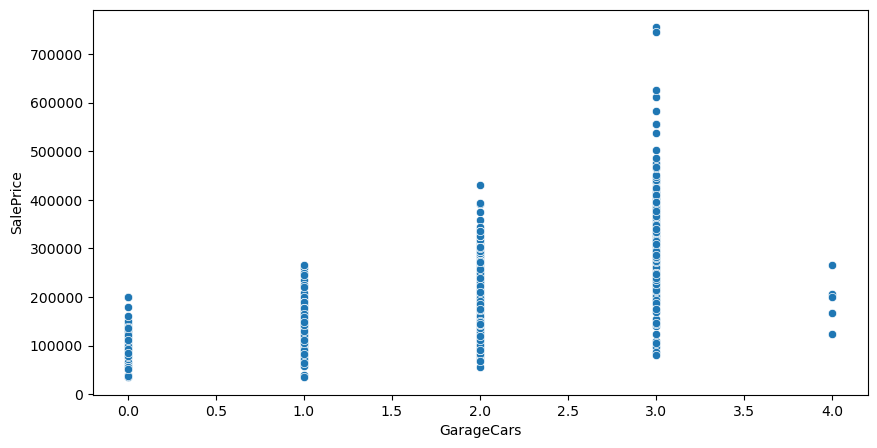

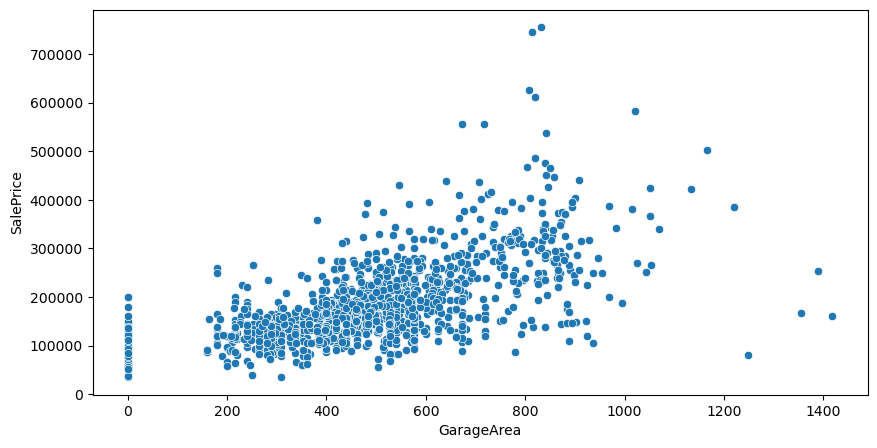

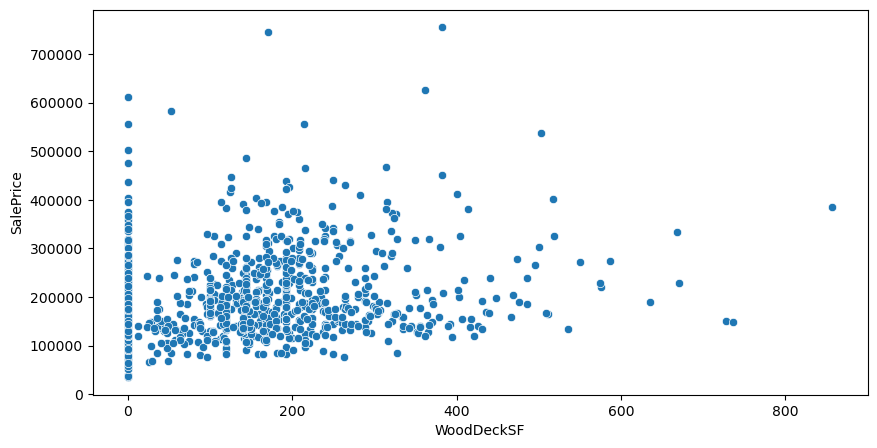

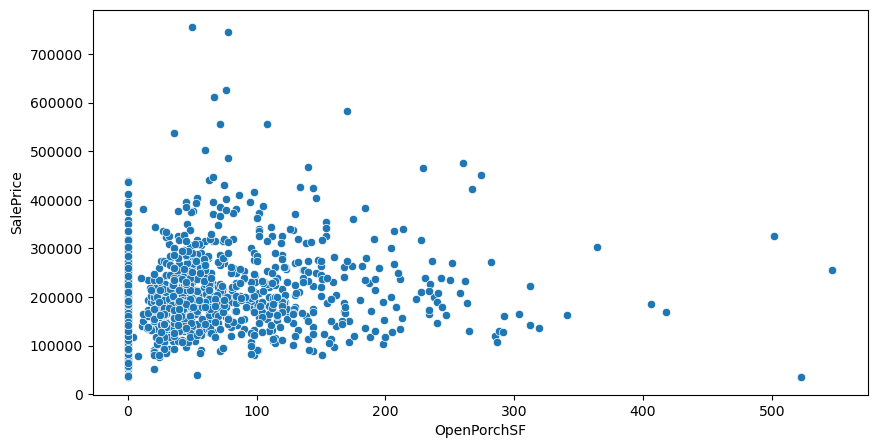

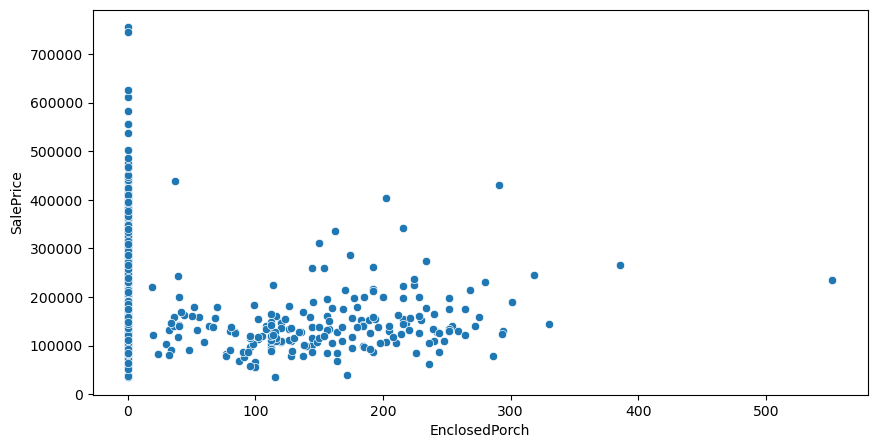

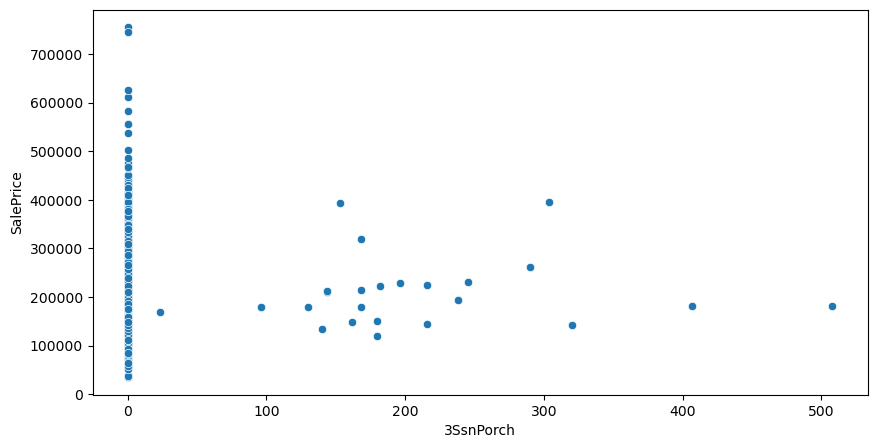

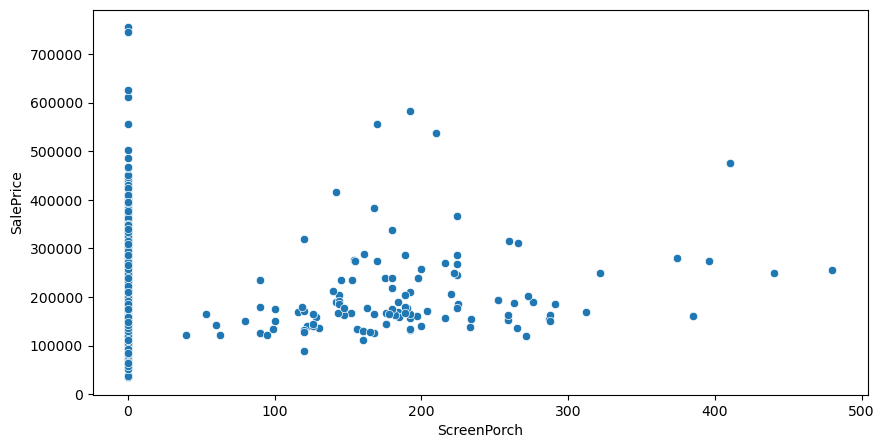

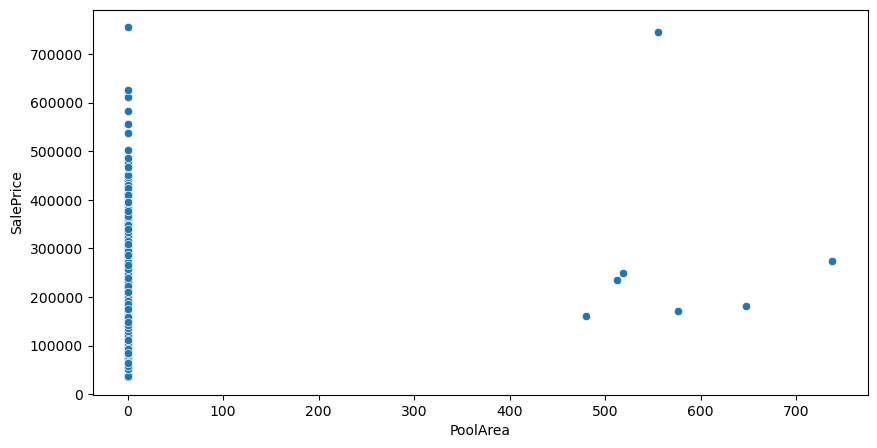

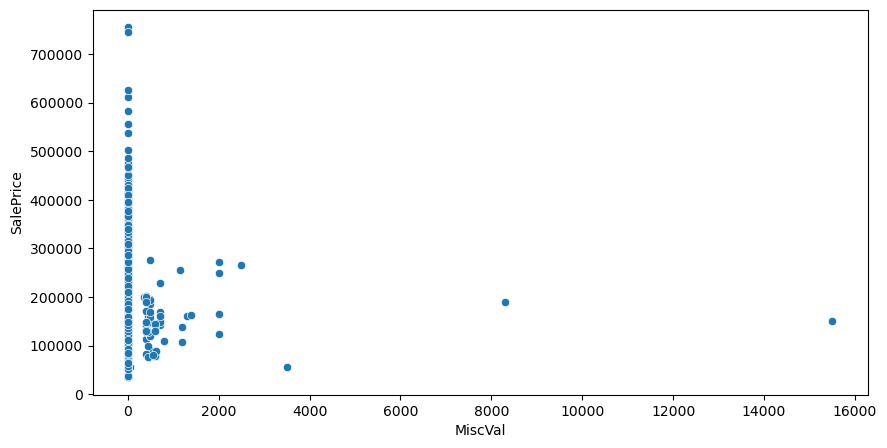

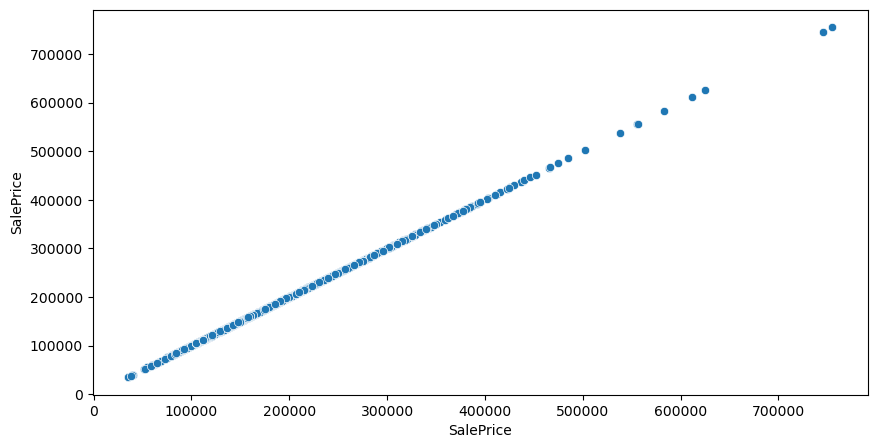

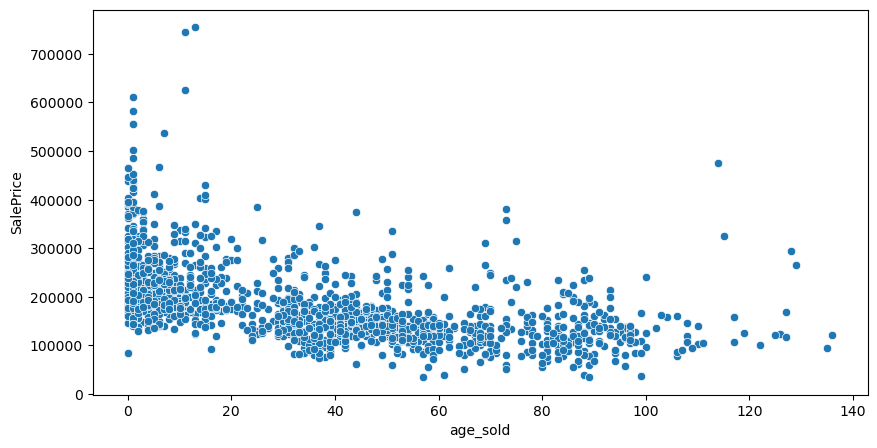

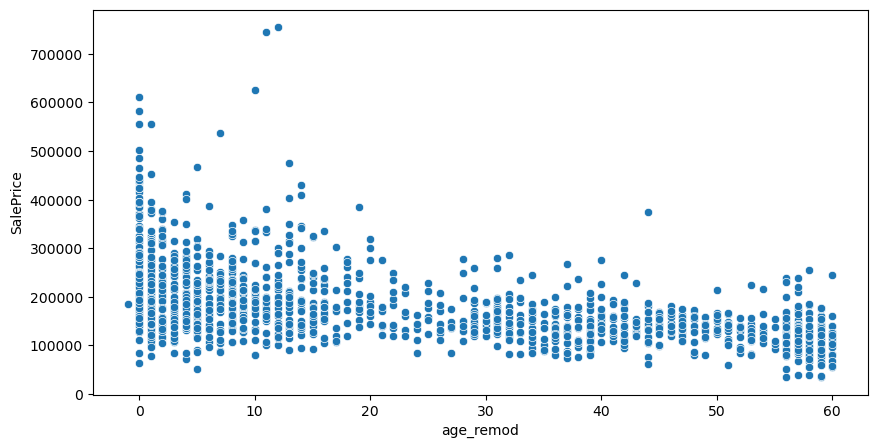

In [27]:
numerical_columns = data.select_dtypes(include=np.number).columns
for column in numerical_columns:
    plt.figure(figsize=(10,5))
    print_scatter_plot(data, column)

Inorder to simplify the model, we can drop the below columns, as these don't show interesting patterns above.
- PoolArea
- LowQualFinSF

We can see above that the prices are high if the age is less.

In [28]:
data = data.drop(['PoolArea', 'LowQualFinSF'], axis=1)

## Categorical Columns
The categorical columns can be plotted using bar plots against the SalePrice.

In [29]:
def plot_barplots(data, column):
    sns.barplot(data=data, x=column, y='SalePrice')
    plt.xticks(rotation=45)
    plt.show()

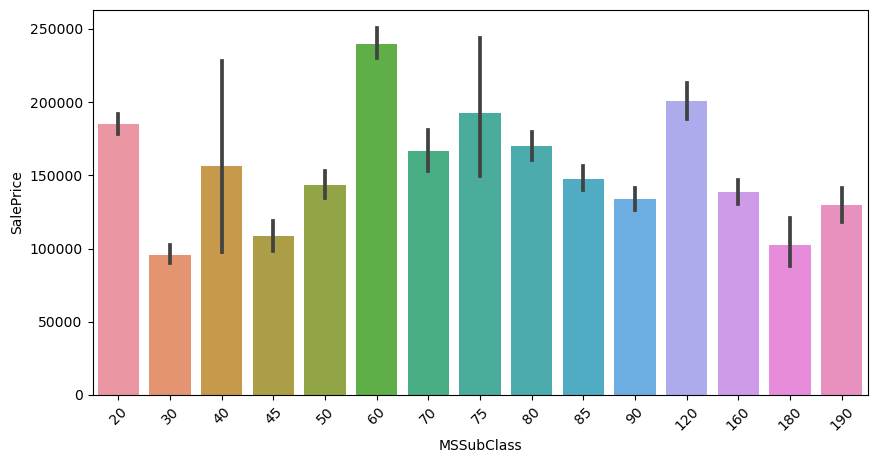

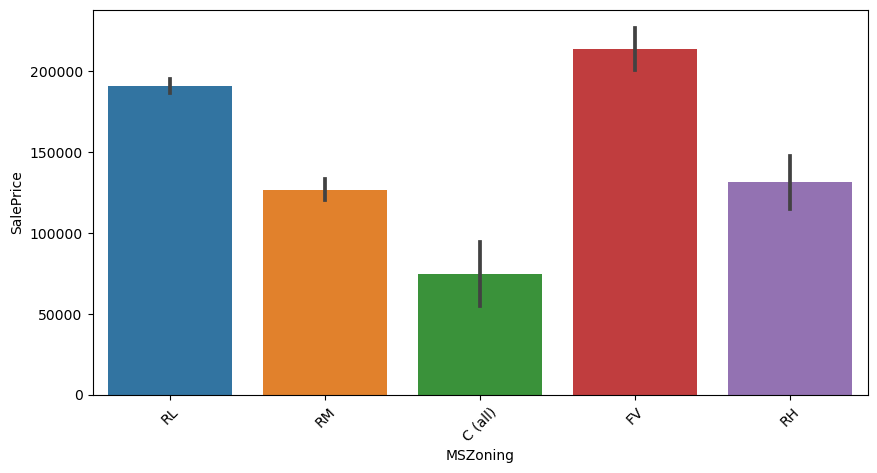

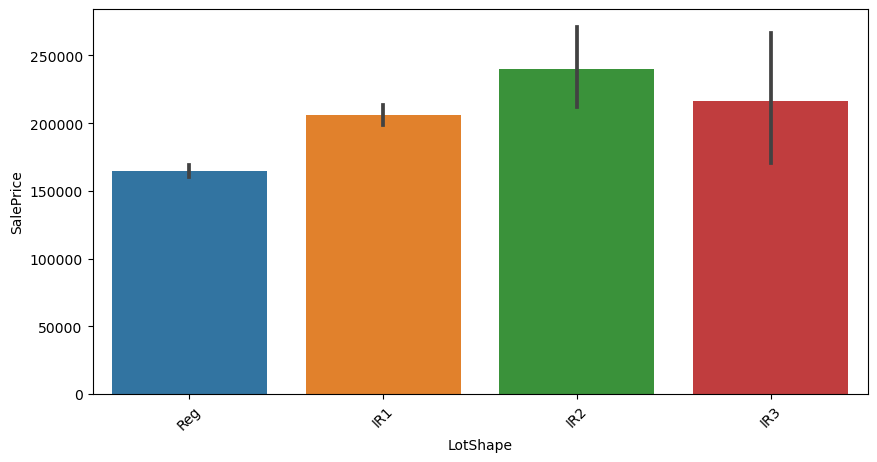

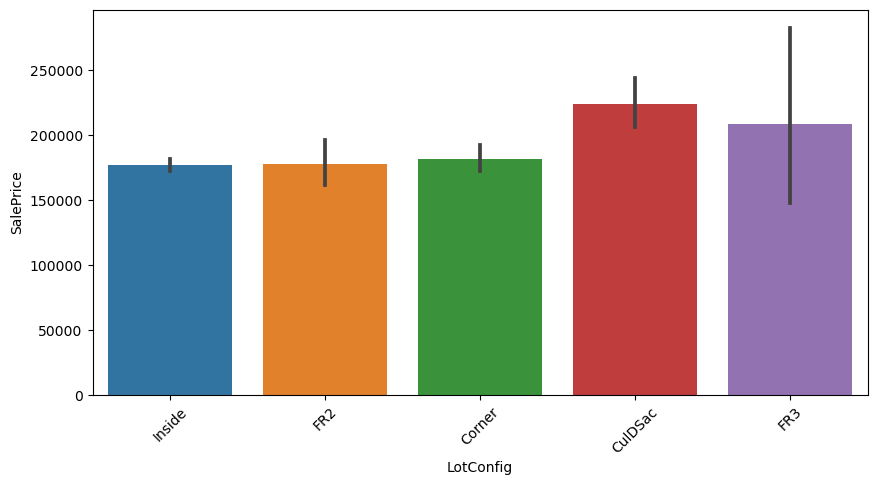

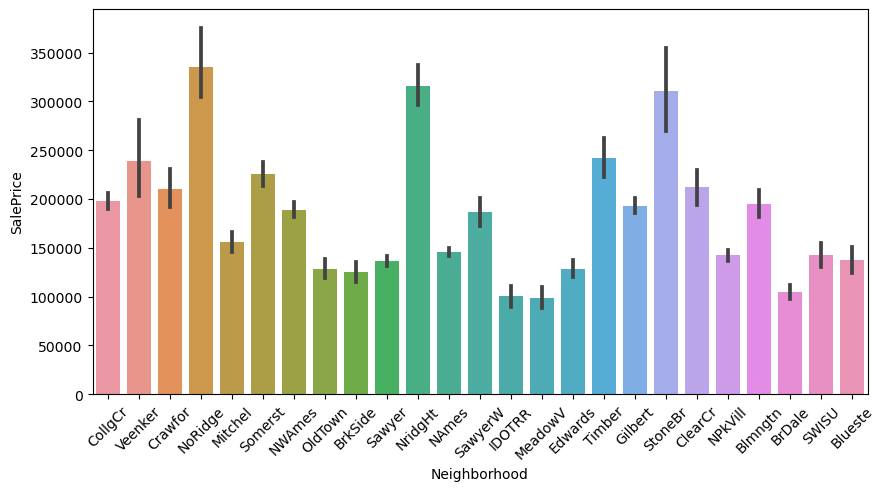

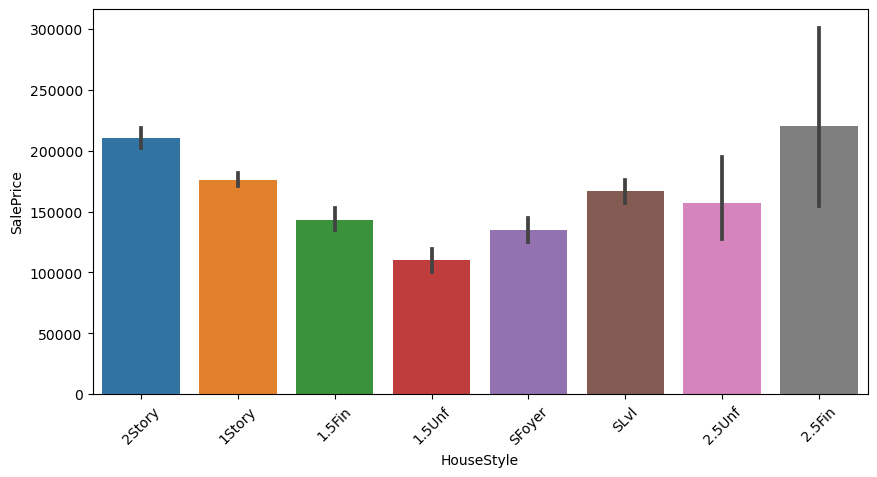

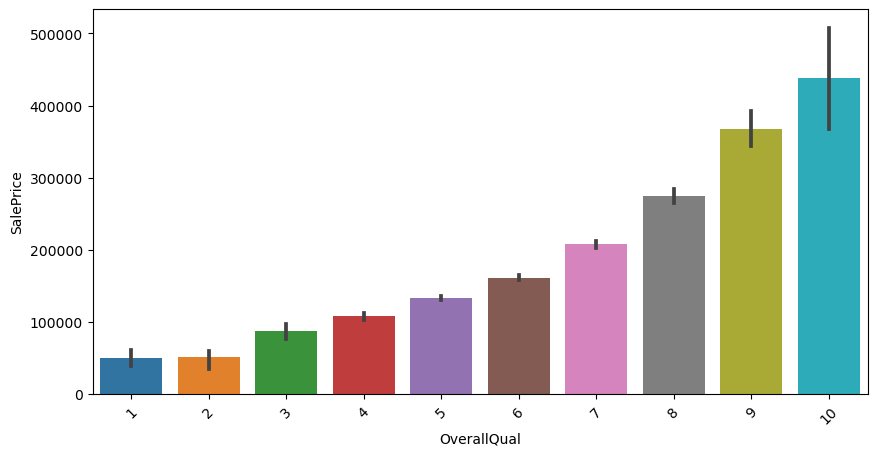

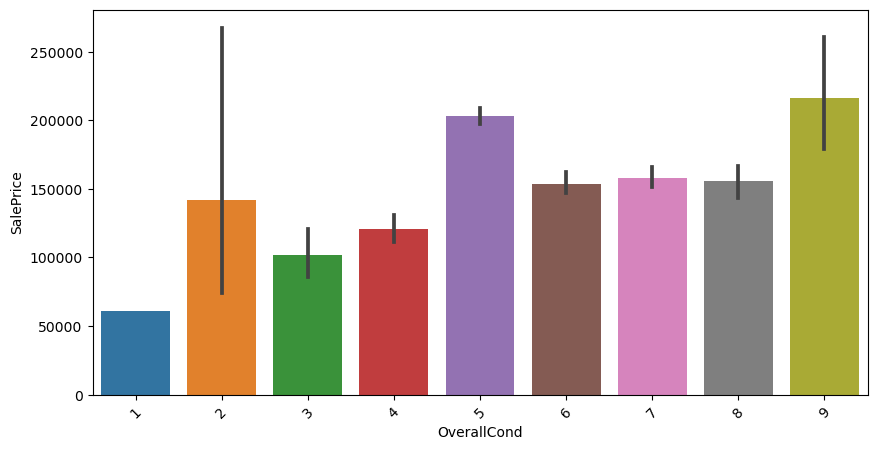

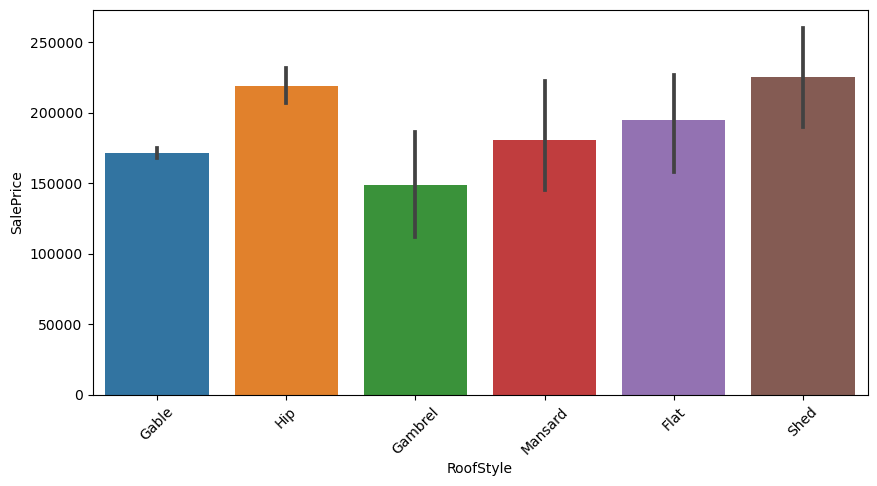

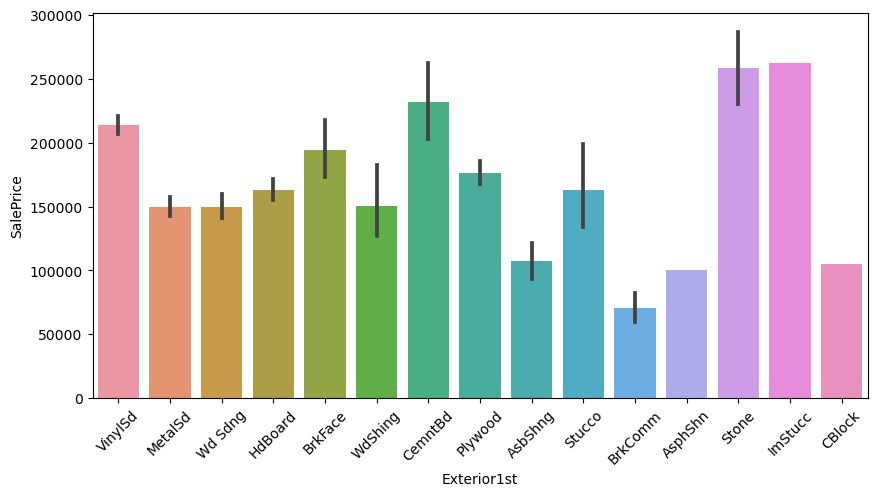

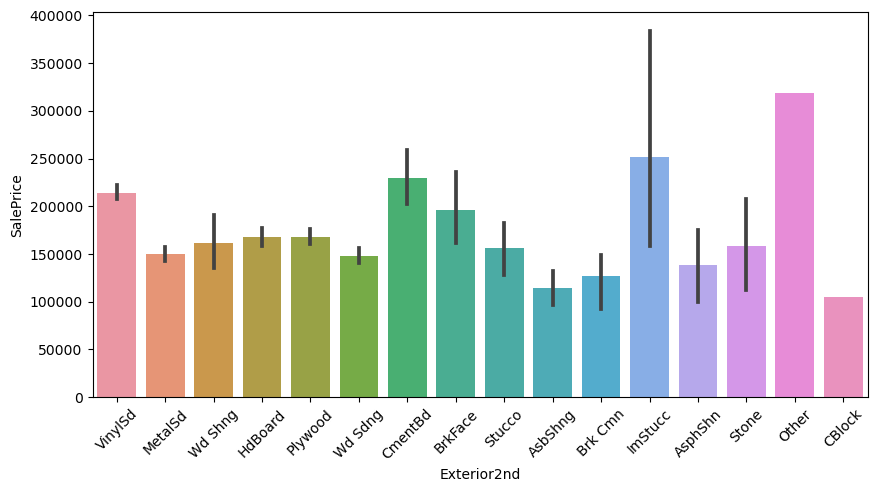

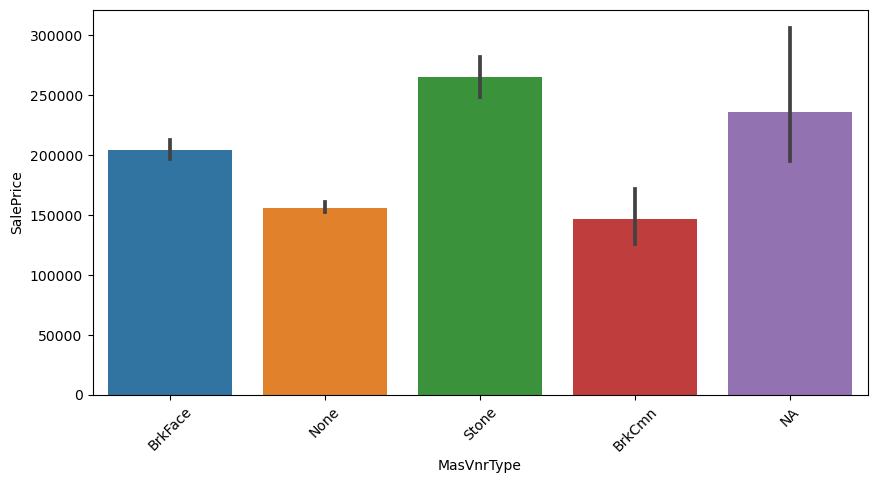

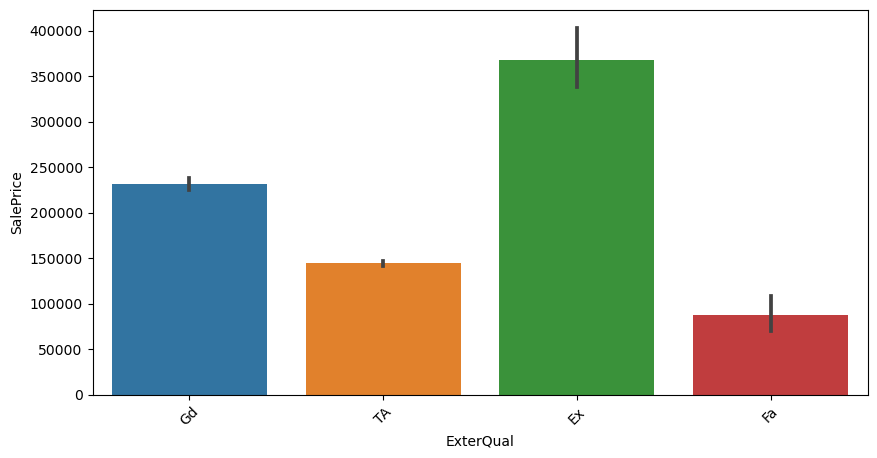

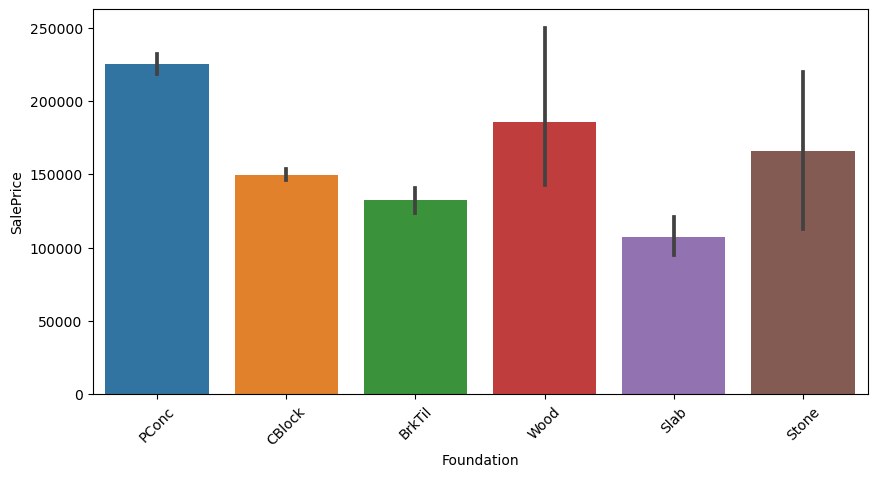

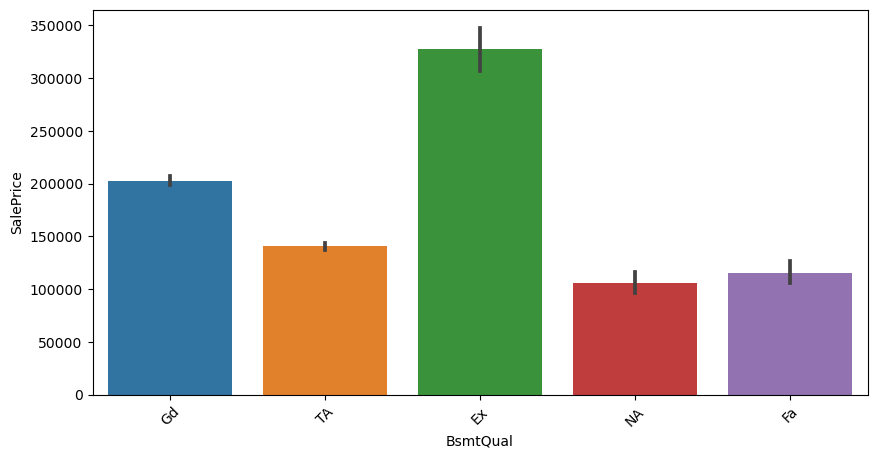

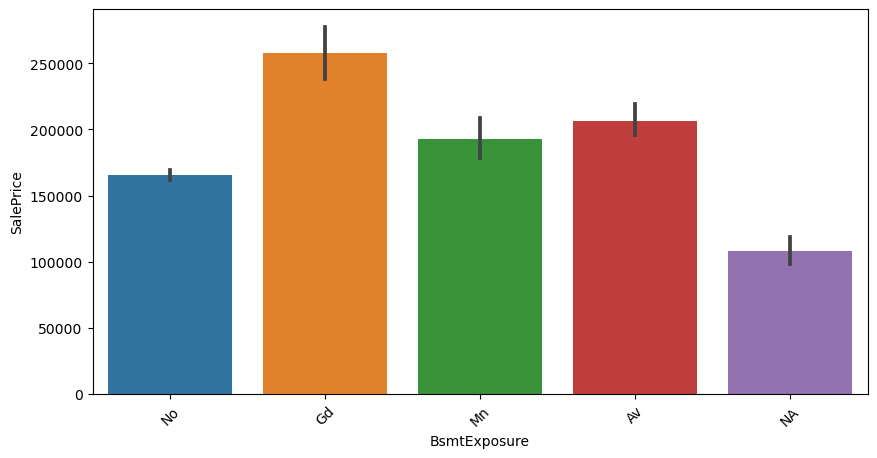

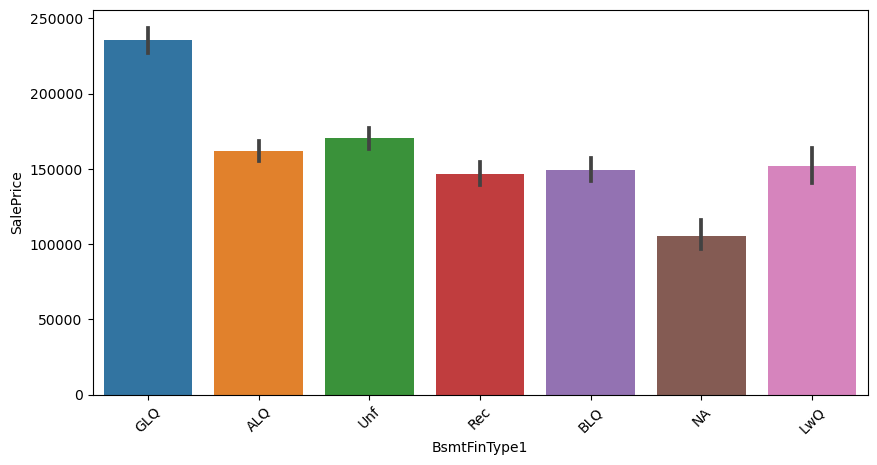

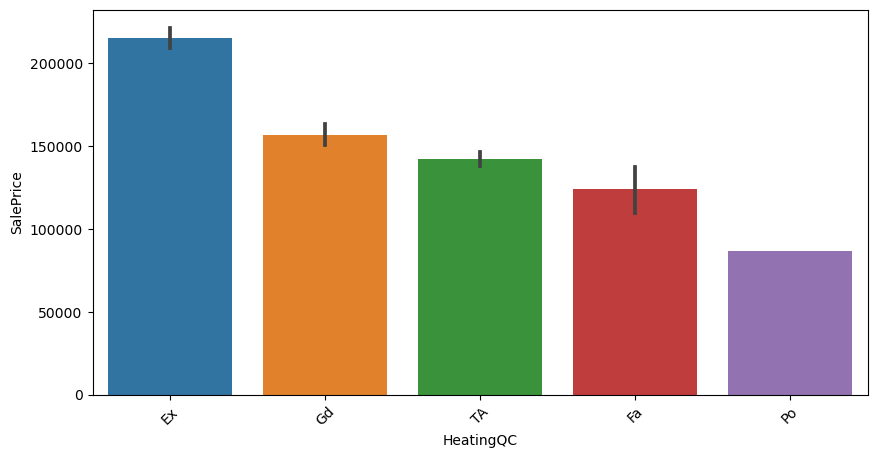

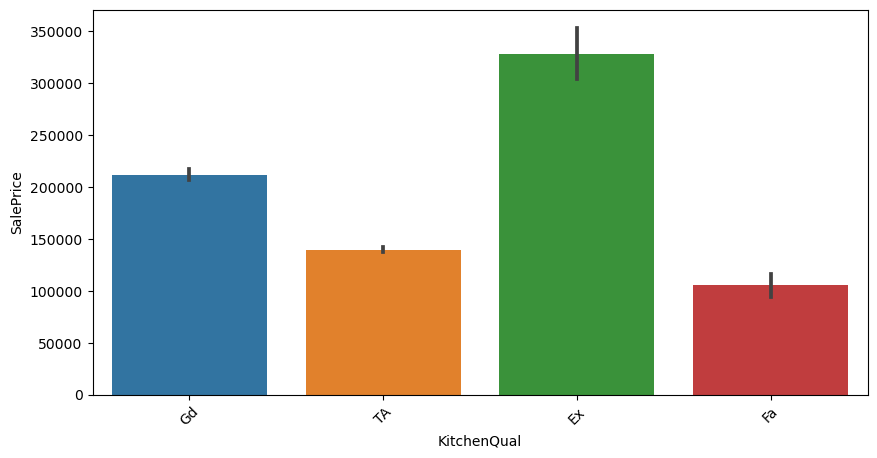

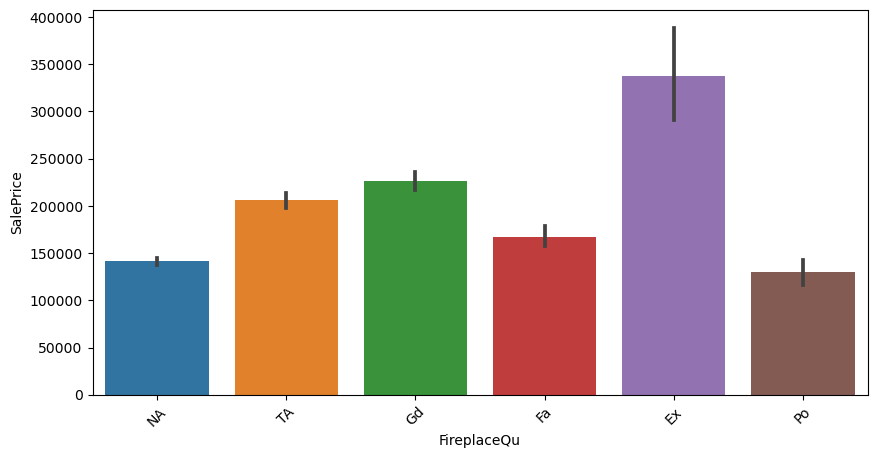

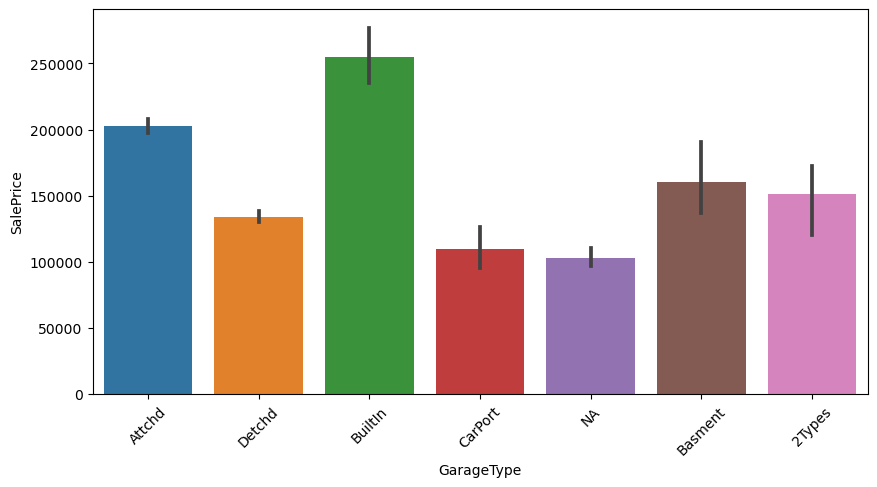

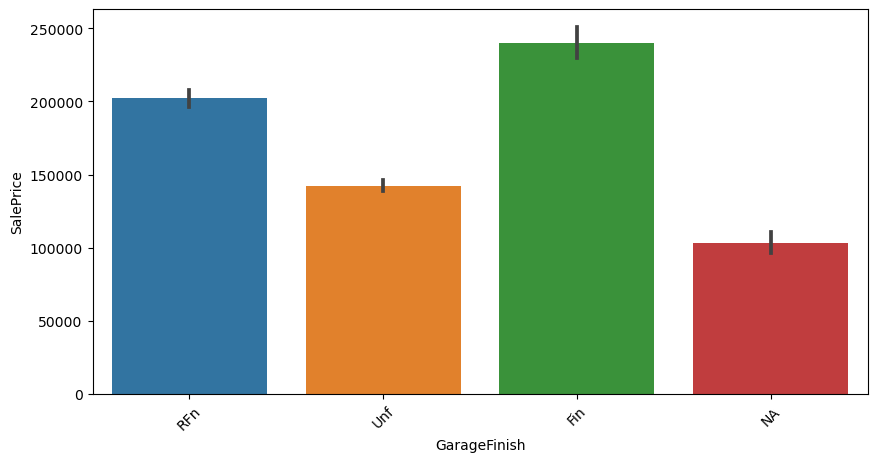

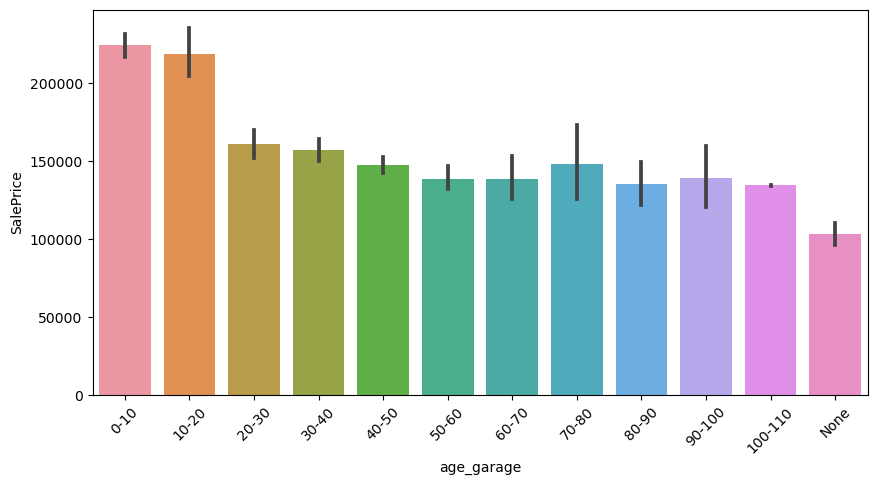

In [30]:
categorical_columns = data.select_dtypes(exclude=np.number).columns
for column in categorical_columns:
    plt.figure(figsize=(10,5))
    plot_barplots(data, column)

## Histogram for SalePrice

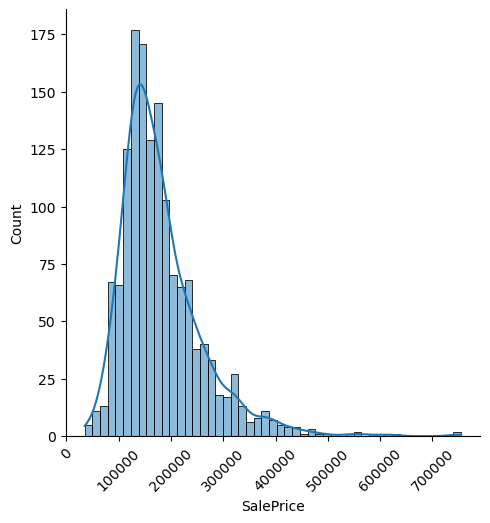

In [31]:
sns.displot(data['SalePrice'], kde=True)
plt.xticks(rotation=45)
plt.show()

From the histogram above, we can see that the SalePrice is skewed. We can use a log transform.

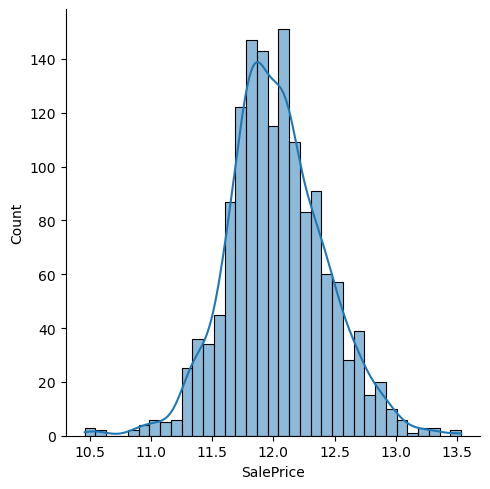

In [32]:
data['SalePrice'] = np.log1p(data['SalePrice'])
sns.displot(data['SalePrice'], kde=True)

## Correlations

<Axes: >

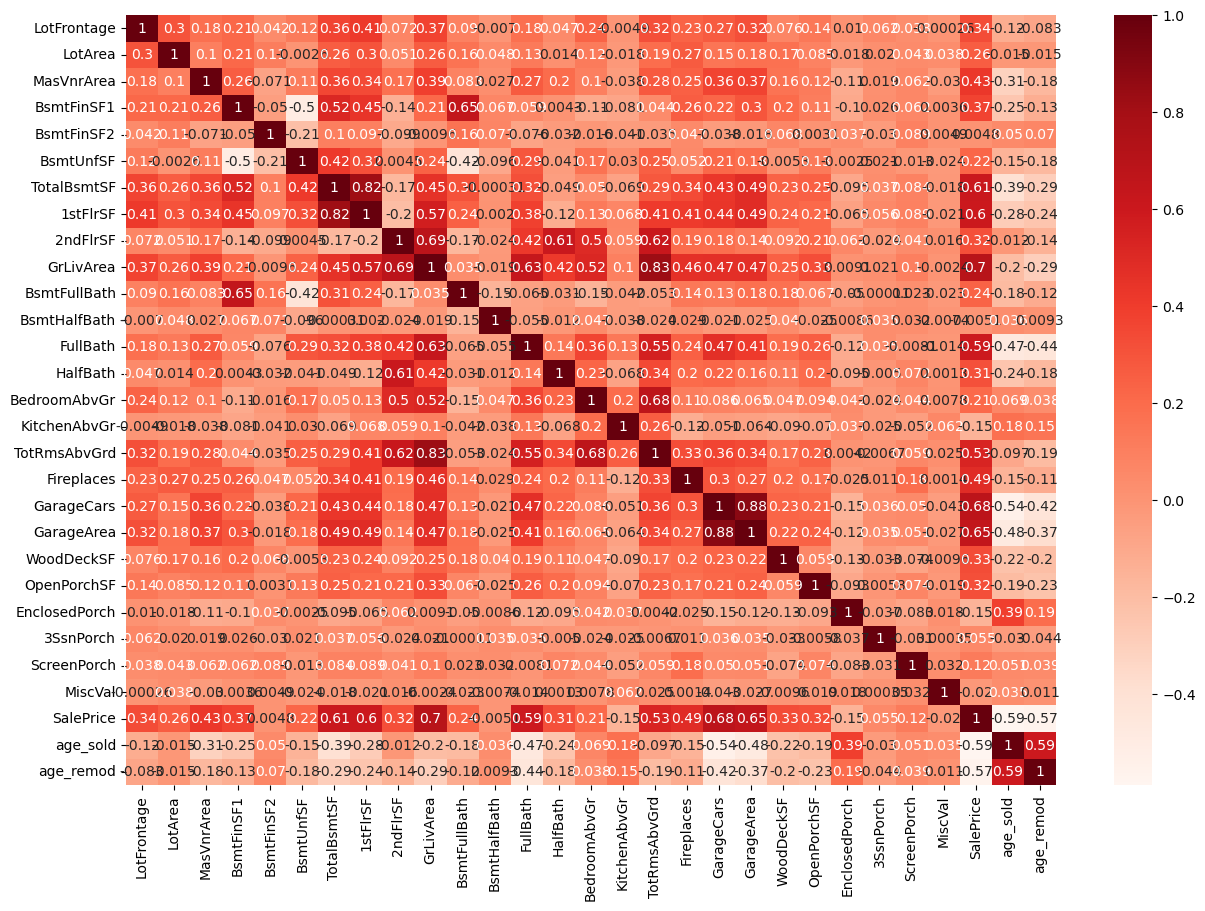

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='Reds', annot=True)

We can see some columns are highly correlated. We can drop the columns having correlation values > 0.6

In [34]:
def highly_correlated_columns(data):
    corr = data.corr()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    return [column for column in upper.columns if any(upper[column] > 0.6)]

In [35]:
correlated_columns = highly_correlated_columns(data.drop('SalePrice', axis=1))
print(correlated_columns)
data = data.drop(correlated_columns, axis=1)

['1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'GarageArea']


# Data Preparations

## Dummy Variable Creation

In [36]:
def convert_to_dummy(data, column):
    dummy_df = pd.get_dummies(data[column], drop_first=True, prefix=column)
    data = pd.concat([data, dummy_df], axis=1)
    return data.drop(column, axis=1)

In [37]:
categorical_columns = data.select_dtypes(exclude=np.number).columns
for column in categorical_columns:
    data = convert_to_dummy(data, column)
    
data.shape

(1460, 187)

In [38]:
correlated_columns = highly_correlated_columns(data.drop('SalePrice', axis=1))
print(correlated_columns)
data = data.drop(correlated_columns, axis=1)

['MSSubClass_60', 'MSSubClass_90', 'Neighborhood_Somerst', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'BsmtQual_NA', 'BsmtQual_TA', 'BsmtExposure_NA', 'BsmtFinType1_NA', 'BsmtFinType1_Unf', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageFinish_NA', 'GarageFinish_Unf', 'age_garage_None']


Since there are many highly correlated features, we will remove few of them.

## Train and Test Data Splitting

In [39]:
df_train,df_test=train_test_split(data,train_size=0.7,random_state=42)

In [40]:
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,age_sold,age_remod,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1Story,HouseStyle_2.5Fin,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_RFn,age_garage_10-20,age_garage_20-30,age_garage_30-40,age_garage_40-50,age_garage_50-60,age_garage_60-70,age_garage_70-80,age_garage_80-90,age_garage_90-100,age_garage_100-110
1452,35.0,3675,80.0,547,0,0,547,0,0,2,1,0,2,0,28,0,0,0,0,11.884496,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
762,72.0,8640,0.0,24,0,732,756,783,0,3,1,0,2,169,45,0,0,0,0,12.279328,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932,84.0,11670,302.0,0,0,1905,1905,0,0,3,1,1,3,0,191,0,0,0,0,12.676079,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
435,43.0,10667,0.0,385,344,70,799,834,0,3,1,1,2,158,61,0,0,0,0,12.264346,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
629,82.0,9020,259.0,624,336,288,1248,0,0,3,1,0,2,176,0,0,0,0,0,12.03469

## Scaling

In [41]:
scaler = MinMaxScaler()
df_train[df_train.columns] = scaler.fit_transform(df_train)
df_test[df_test.columns] = scaler.transform(df_test)

In [42]:
X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']
X_test = df_test.drop('SalePrice',axis=1)
y_test = df_test['SalePrice']

## Find the most important variables using RFE

Using Recursive Feature Elimination select 25 important features

In [43]:
lr = LinearRegression()
rfe = RFE(lr, step=25)
rfe = rfe.fit(X_train, y_train)

The selected features are as follows

In [44]:
selected_features = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['Column', 'RFE Support', 'Ranking']).sort_values(by=['Ranking'])
selected_features = selected_features[selected_features['RFE Support']]
selected_features

,Column,RFE Support,Ranking
0,LotFrontage,True,1
79,OverallCond_3,True,1
77,OverallQual_10,True,1
76,OverallQual_9,True,1
75,OverallQual_8,True,1
74,OverallQual_7,True,1
73,OverallQual_6,True,1
72,OverallQual_5,True,1
71,OverallQual_4,True,1
70,OverallQual_3,True,1


In [45]:
X_train = X_train[selected_features['Column']]

## Eliminate Columns with High VIF

High VIF indicates high correlation and features with high VIF can be iteratively removed. In this section we will check the VIF values for each feature and iteratively remove featueres with high VIF until all the features remaining are having VIF less than 5.

In [46]:
# Utility function to calculate VIF
def calculate_vif(X, drop=False):
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
        vif_data = vif_data.sort_values(by=['VIF'], ascending=False)
        highest_value = vif_data.iloc[0]['VIF']
        if drop and highest_value > 5.0:
            column_to_drop = vif_data.iloc[0]['Feature']
            print(f'Dropping column {column_to_drop} with vif {highest_value}')
            X.drop(column_to_drop, axis=1, inplace=True)
        else:
            print(vif_data)
            break
    

In [47]:
calculate_vif(X_train, True)

Dropping column BsmtFinSF2 with vif inf
Dropping column OverallCond_5 with vif 811.8251378342424
Dropping column MSZoning_RL with vif 157.61760433285417
Dropping column TotalBsmtSF with vif 82.1217629144919
Dropping column KitchenAbvGr with vif 40.155640119826145
Dropping column BedroomAbvGr with vif 28.9051653048781
Dropping column age_sold with vif 17.716579392543984
Dropping column OverallQual_6 with vif 13.529847219297466
Dropping column GarageCars with vif 11.476631986698882
Dropping column LotFrontage with vif 9.299533828516026
Dropping column HouseStyle_1Story with vif 8.58737039474714
                 Feature       VIF
58            BsmtFinSF1  4.633809
46             age_remod  4.328137
61             BsmtUnfSF  3.747924
64            Fireplaces  2.991601
54           MSZoning_RM  2.902917
57              2ndFlrSF  2.624023
22      BsmtFinType1_GLQ  2.541435
3          OverallQual_8  2.528800
59               LotArea  2.389856
4          OverallQual_7  2.385955
12  Neighborhoo

Now all the remaining features have acceptable values for VIF (<5) which indicates low multicollinearity

# Linear Regression Model

For comparison we will start with a linear regression model using OLS

In [48]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
print(lm.intercept_)
print(lm.coef_)

0.43255064601357607
[-8.36984629e-02  7.34571331e-02  1.22110026e-01  7.33757764e-02
  3.52438060e-02 -2.12383920e-02 -4.76414876e-02 -1.05203027e-01
 -1.51043245e-01  3.71001217e-02  6.39530646e-02 -1.18512194e-02
 -2.32582675e-02  5.66629849e-02  3.83692433e-02 -1.23413873e-02
 -1.11766021e-02 -1.81756830e-02 -2.44612243e-02  9.47683750e-03
  2.10123037e-02 -8.02597737e-02  1.69296629e-02  2.54917470e-02
 -3.61852114e-02  6.67407648e-03 -3.09186669e-02 -4.73018396e-02
 -3.91094656e-02  3.24669026e-02  1.26872337e-01 -3.01594895e+12
 -8.75368626e-03  5.54199219e-02 -1.61132812e-02 -8.85009766e-04
  2.32543945e-02  1.69095993e-02  9.76562500e-04  6.95800781e-03
  3.17993164e-02 -2.36816406e-02  5.67779541e-02 -1.81884766e-02
 -6.48193359e-02 -4.95910645e-04 -6.27441406e-02 -3.08837891e-02
 -6.33544922e-02 -5.41992188e-02  3.56445312e-02 -2.19345093e-02
 -5.20172119e-02  7.28149414e-02 -2.81372070e-02  2.12707520e-02
  2.12783813e-02  1.06052399e-01  3.03710938e-01  1.52160645e-01
  6.1

In [50]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test[X_train.columns])

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8553825253151526
-1.1468543264225793e+24
2.445230670656204
9.095948039984863e+24
0.0023949369937866834
2.0719699407710393e+22


The test data has a negative R2 and this model cannot be used. Switching to Ridge or Lasso Model

# Ridge Model

In [60]:
def find_best_alpha(estimator, X_train, y_train):
    params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

    # cross validation
    folds = 5
    model_cv = GridSearchCV(estimator = estimator, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)      
    model_cv.fit(X_train, y_train) 
    return model_cv.best_params_

In [61]:
best_alpha_ridge = find_best_alpha(Ridge(), X_train, y_train)
print(best_alpha)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


In [62]:
alpha = best_alpha_ridge['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.08231316  0.07781762  0.12247432  0.0734163   0.03484918 -0.02145589
 -0.04802236 -0.10394793 -0.12546177  0.03642998  0.06384542 -0.01194083
 -0.02290661  0.05675748  0.03923665 -0.01243816 -0.01093677 -0.01770405
 -0.02426786  0.0096761   0.01967469 -0.06591105  0.0175329   0.02634769
 -0.03267843  0.00216535 -0.03066399 -0.0334334  -0.03175653  0.03140763
  0.09195977  0.         -0.00803669  0.0549176  -0.0159233  -0.00434626
  0.02192509  0.01665828  0.00053439  0.00686567  0.03238267 -0.02218439
  0.05387375 -0.01883372 -0.06627862 -0.00131527 -0.06289813 -0.03105753
 -0.06371826 -0.05414075  0.03519719 -0.0219615  -0.0438067   0.07172579
 -0.02899981  0.01972812  0.02130988  0.10320383  0.28005817  0.14228053
  0.00408292  0.10308416  0.05939969 -0.01240997  0.05807804  0.01768174
 -0.06193648 -0.02169398]


In [63]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test[X_train.columns])

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8551801083849261
0.8450361497089809
2.4486531898720063
1.2290515873275183
0.0023982891183859023
0.002799661930131021


# Lasso Model

In [64]:
best_alpha_lasso = find_best_alpha(Lasso(), X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [65]:
alpha = best_alpha_lasso['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [66]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test[X_train.columns])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8511768306963187
0.84321280700506
2.5163416722540193
1.2435129100185045
0.0024645853792889514
0.002832603439677687


In [67]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.553825e-01,0.855180,0.851177
1,R2 Score (Test),-1.146854e+24,0.845036,0.843213
2,RSS (Train),2.445231e+00,2.448653,2.516342
3,RSS (Test),9.095948e+24,1.229052,1.243513
4,MSE (Train),4.893809e-02,0.048972,0.049645
5,MSE (Test),1.439434e+11,0.052912,0.053222


We can see that the R2 Score in linear regression is a high negative value.

Ridge Regression has the best R2 values and they are sort of similar in both Train and Test data.

## Lets observe the changes in the coefficients after regularization

In [68]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Linear,Ridge,Lasso
OverallCond_3,-8.369846e-02,-0.082313,-0.076800
OverallQual_10,7.345713e-02,0.077818,0.076370
OverallQual_9,1.221100e-01,0.122474,0.122524
OverallQual_8,7.337578e-02,0.073416,0.074387
OverallQual_7,3.524381e-02,0.034849,0.034781
OverallQual_5,-2.123839e-02,-0.021456,-0.022454
OverallQual_4,-4.764149e-02,-0.048022,-0.049629
OverallQual_3,-1.052030e-01,-0.103948,-0.104591
OverallQual_2,-1.510432e-01,-0.125462,-0.048968
HouseStyle_2.5Fin,3.710012e-02,0.036430,0.025802


# Summary

From the above we can see that the simple linear regression model is having a very negative value for Test data. A negative R-squared value can happen if the model performs worse than a horizontal line.

For the Ridge Regression model, the R2 score for Train and Test remains similar, indicating the model is good for prediction. 

While the Lasso Regression model has an R2 value which is very slightly lower than that of Ridge model, it eliminates few features which would make the model simpler to understand.

In [72]:
print(f'The optimum value for lambda for the Ridge model is {best_alpha_ridge["alpha"]}')
print(f'The optimum value for lambda for the Lasso model is {best_alpha_lasso["alpha"]}')

The optimum value for lambda for the Ridge model is 0.2
The optimum value for lambda for the Lasso model is 0.0001


In [70]:
## Top Variables

betas['Lasso'].sort_values(key=abs, ascending=False).head(10)



BsmtFinSF1        0.272803
OverallQual_9     0.122524
LotArea           0.115292
OverallQual_3    -0.104591
2ndFlrSF          0.102139
BsmtUnfSF         0.101287
OverallCond_3    -0.076800
OverallQual_10    0.076370
OverallQual_8     0.074387
age_remod        -0.065920
Name: Lasso, dtype: float64